In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def graphing_min(x,y):
    
    i0 = min(y)
    for i in range(0,len(y)):
        if i0 == y[i]:
            break
    f0 = x[i]
    
    for i in range(len(y)):
        if y[i] < i0*np.sqrt(2):
            break
    y_min_index, y_nmin_index = i,i-1
    y_minute = np.linspace(y[y_min_index], y[y_nmin_index], 100000)
    i=0
    for i in range(len(y_minute)):
        if y_minute[i] > i0*np.sqrt(2):
            break
    x_lminute, x_rminute = np.linspace(x[y_min_index],x[y_min_index-1],100000),np.linspace(x[y_min_index],x[y_min_index+1],100000)
    bandwidth = x_rminute[i] - x_lminute[i]

    plotting(x,y)
    return bandwidth




In [40]:
def plotting(x,y):
    
    plt.loglog(x,y,color='blue')
    plt.scatter(x,y,color='red',lw=3)
    plt.title("Graph of frequency vs current")
    plt.grid(which="both")
    plt.xlabel("Frequency")
    plt.ylabel("Current")
    plt.show()

In [41]:
def graphing_max(x,y):
    
    i0 = max(y)
    for i in range(0,len(y)):
        if i0 == y[i]:
            break

    f0 = x[i]
    
    for i in range(len(y)):
        if y[i] > i0/np.sqrt(2):
            break
    y_max_index, y_nmax_index = i,i+1
    y_minute = np.linspace(y[y_max_index], y[y_nmax_index], 1000)
    i=0
    for i in range(len(y_minute)):
        if y_minute[i] < i0/np.sqrt(2):
            break
    x_lminute, x_rminute = np.linspace(x[y_max_index],x[y_max_index-1],1000),np.linspace(x[y_max_index],x[y_max_index+1],1000)
    bandwidth = x_rminute[i] - x_lminute[i]

    
    plotting(x,y)
    return bandwidth



In [42]:
def graphing_decrease(x,y):
    i0 = max(y)
    for i in range(0,len(y)):
        if i0 == y[i] and y[i]!=y[i+1]:
            break
    print(i)
    f0 = x[i]
    
    for i in range(len(y)):
        if y[i] < i0/np.sqrt(2):
            break
    y_max_index, y_nmax_index = i, i+1
    y_minute = np.linspace(y[y_max_index], y[y_nmax_index], 1000)
    i=0
    for i in range(len(y_minute)):
        if y_minute[i] < i0/np.sqrt(2):
            break
    print(i)
    x_minute = np.linspace(x[y_max_index],x[y_nmax_index],1000)
    bandwidth = x_minute[i]
    
    
    plotting(x,y)
    return bandwidth

    

In [43]:
def graphing_increase(x,y):
    i0 = max(y)
    for i in range(0,len(y)):
        if i0 == y[i] and y[i]==y[i+1]:
            break
    f0 = x[i]
    
    for i in range(len(y)):
        if y[i] > i0/np.sqrt(2):
            break
    y_max_index, y_nmax_index = i, i-1
    y_minute = np.linspace(y[y_max_index], y[y_nmax_index], 1000)
    i=0
    for i in range(len(y_minute)):
        if y_minute[i] < i0/np.sqrt(2):
            break
    x_minute = np.linspace(x[y_max_index],x[y_nmax_index],1000)
    bandwidth = x_minute[i]
    
    
    plotting(x,y)
    return bandwidth


In [44]:
def graphing_dual(x,y):
    
    plotting(x,y)
    
    
    l_index, r_index = 0, 0
    for i in range(len(y)):
        if y[i]==y[i+1] and l_index==0:
            l_index = i
        if y[i]>y[i+1] and l_index!=0:
            r_index = i
            break
    
    i0 = max(y)
    for i in range(0,l_index):
        if y[i] > i0/np.sqrt(2):
            break
    y_max_index, y_nmax_index = i, i-1
    y_minute = np.linspace(y[y_max_index], y[y_nmax_index], 1000)
    i=0
    for i in range(len(y_minute)):
        if y_minute[i] < i0/np.sqrt(2):
            break
    x_minute = np.linspace(x[y_max_index],x[y_nmax_index],1000)
    lf = x_minute[i]
    
    
    for i in range(l_index+1,r_index):
        if y[i] > i0/np.sqrt(2):
            break
    y_max_index, y_nmax_index = i, i+1
    y_minute = np.linspace(y[y_max_index], y[y_nmax_index], 1000)
    i=0
    for i in range(len(y_minute)):
        if y_minute[i] < i0/np.sqrt(2):
            break
    x_minute = np.linspace(x[y_max_index],x[y_nmax_index],1000)
    rf = x_minute[i]
    
    
    
    
    
    return rf - lf

In [51]:
def main(x,y):
    y_max, y_min = max(y),min(y)
    count = 0
    
    for i in range(len(x)-1):
        if y[i] == y[i+1]:
                count = count+1
    if count!=0:
        if y[0] == y_max or y[-1] == y_max:
            if y[0] == y[1] or y[1]==y[2]:
                bandwidth = graphing_decrease(x,y)
            elif y[-1] == y[-2] or y[-2] == y[-3]:
                bandwidth = graphing_increase(x,y)
        else:
            bandwidth = graphing_dual(x,y)
    else:
        if y.index(y_max) !=0:
            bandwidth = graphing_max(x,y)
        else:
            bandwidth = graphing_min(x,y)
    return bandwidth
            

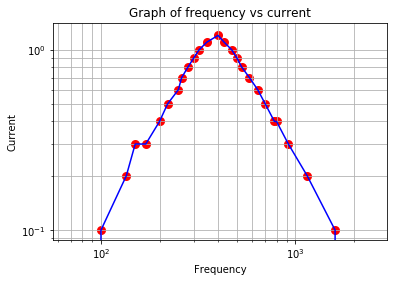

gdual


185.0

In [46]:
main([70,100,135,150,170,200,220,250,260,280,300,320,350,400,430,470,500,530,580,640,700,780,800,920,1150,1600,2400],[0,0.1,0.2,0.3,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.1,1,0.9,0.8,0.7,0.6,0.5,0.4,0.4,0.3,0.2,0.1,0.0])

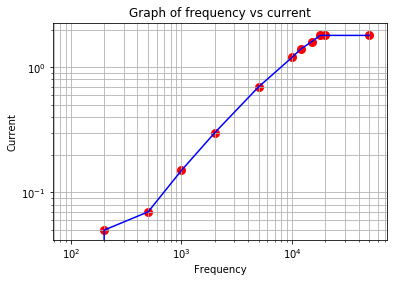

ginc


10726.726726726727

In [47]:
main([100,200,500,1000,2000,5000,10000,12000,15000,18000,20000,50000],[0,0.05,0.07,0.15,0.3,0.7,1.2,1.4,1.6,1.8,1.8,1.8])

gdec
5
0


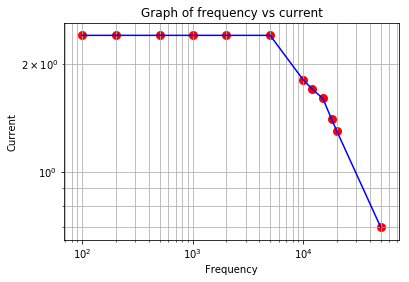

15000.0

In [48]:
main([100,200,500,1000,2000,5000,10000,12000,15000,18000,20000,50000],[2.4,2.4,2.4,2.4,2.4,2.4,1.8,1.7,1.6,1.4,1.3,0.7])

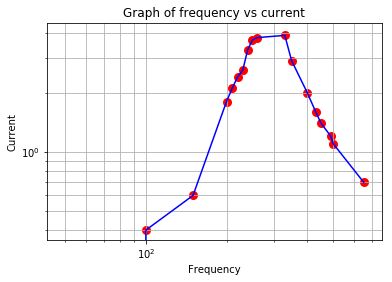

gmax


20.0

In [49]:
main([50,100,150,200,210,220,230,240,250,260,330,350,400,430,450,490,500,650],[0,0.4,0.6,1.8,2.1,2.4,2.6,3.3,3.7,3.8,3.9,2.9,2,1.6,1.4,1.2,1.1,0.7])

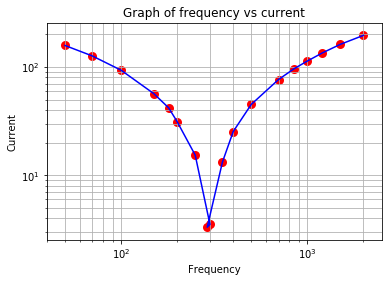

3.9556395563955675


In [50]:
import pandas as pd
file=pd.read_csv("/home/raghuttam/Documents/parallel_resonant.csv")
bandwidth = graphing_min(file['f2'],file['c2'])
print(bandwidth)